<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'>SPAM detection.</h1>
</div>

<strong>Content:</strong>

1. Load the Data.
    + Importing Libraries.
    + Loading the data.
3. Splitting the data.
2. Data Overview.
3. Using TfidfVectorizer.

The dataset use in this project can be found in this [link](https://www.kaggle.com/uciml/sms-spam-collection-dataset).
<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>1. Load the Data</h2>
</div>

In this section you will:

- Import the libraries.
- Load the dataset.

### 1.1 Import Libraries

In [1]:
import re
import os

import pandas as pd
import numpy as np

#for data visualization
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

#to data split
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

### 1.2 Loading the data.

In [2]:
df = pd.read_csv("spam.csv",encoding = "ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
#removing the Unnamed columns
df.dropna(axis = 1, inplace = True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
#reanming the columns
df.rename(columns = {"v1":"label","v2":"text"}, inplace = True)
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>2. Data Overview</h2>
</div>

In [5]:
#let's see how long are the messages
df["length"] = df["text"].apply(lambda t:len(t))
df.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [6]:
df['length'].describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

In [7]:
df["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

We have 4825 ham messages and just 747 spam messages, this dataset is highly unbalanced.

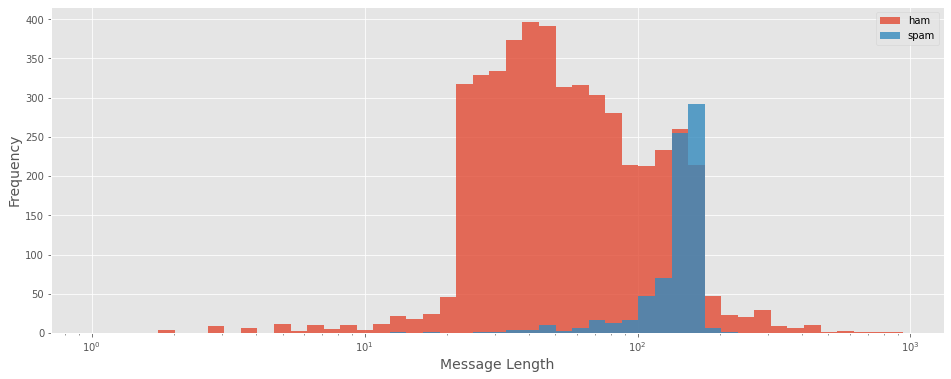

In [8]:
plt.figure(figsize=(16,6))
plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.xlabel("Message Length", fontsize = 14)
plt.ylabel("Frequency", fontsize = 14)
plt.show()

In the histogram shown above we can see the data distributions according to the length of the message. we can observe how messages that are spam have greater length than messages that are not spam. This is just a feature of spam messages since, as can be seen, there are messages that are not spam, but also have a long length. However, the distributions are quite different, so this feature could work to feed a machine learning model.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>3.Splitting the data</h2>
</div>



In [9]:
#let's split the dataset into train and test data sets
X_train, X_test, y_train, y_test = train_test_split(df["text"],df["label"], test_size=0.3 ,random_state = 42)
print(f"X train instances: {X_train.shape[0]}\nX test instances: {X_test.shape[0]}")

X train instances: 3900
X test instances: 1672


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>4. Using TfidVectorizer</h2>
</div>


**TfidVectorizer**

This technique uses the TfidVectorizer transformation to turn text data into numerical features, this technique uses the word frequency (How many times one word appears in a document) to create a dense vector of feature.
<hr>

**Using the LinearSVC algorithm**

The LinearSVC algorithm is just an implementation of SVM (Support Vector Machine) with a linear kernel, this implementation works well with both dense and sparse input, and is faster than non linear algorithms.

<hr>

**Using Scikit Learn pipelines**

Scikit learn allows us to use a pipe line class which serves like a kind of classifier by steps, so we can assemble the steps and wrap all the procedures in a more compact form.
<hr>



In [10]:
text_classifier = Pipeline([
    ('tfidvectorizer',TfidfVectorizer()),
    ('LinearSVC',LinearSVC())
])

text_classifier.fit(X_train,y_train)

Pipeline(steps=[('tfidvectorizer', TfidfVectorizer()),
                ('LinearSVC', LinearSVC())])

In [11]:
predictions = text_classifier.predict(X_test)

Text(0.5, 1.0, 'Confusion matrix')

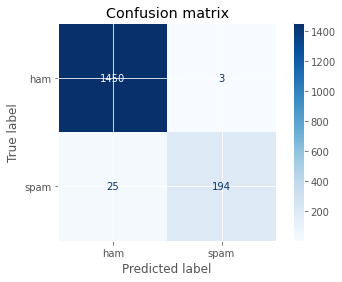

In [12]:
# Plot non-normalized confusion matrix
title = "Confusion matrix"
normalize = None

class_names = text_classifier.classes_

disp = plot_confusion_matrix(text_classifier, X_test, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             normalize=normalize)
disp.ax_.set_title(title)

In [13]:
#general accuracy
print(accuracy_score(y_test,predictions))

0.9832535885167464


**Conclussions:**

We have seen how we can implement a spam detector with a few lines of code, in this scenario the model performance is pretty good, reaching an accuracyof almost 100 %, this problem is simple to solve, and show how to use scikit-learn to implement classifiers.